In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
kmeans_1 = pd.read_csv('C:\\Users\\Sebastian\\Downloads\\kmeans.1.csv', sep=",")
kmeans_2 = pd.read_csv('C:\\Users\\Sebastian\\Downloads\\kmeans2.csv', sep=",")

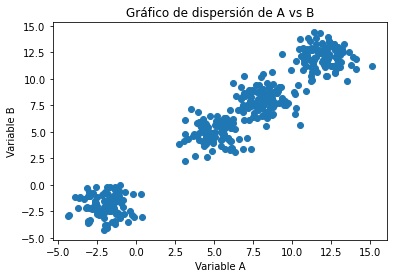

c:\Users\Sebastian\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sebastian\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


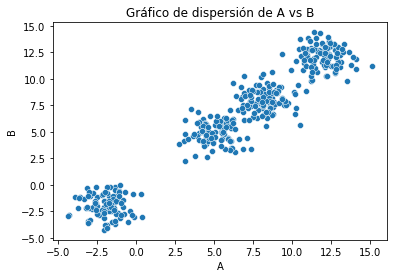

In [3]:
# Usando matplotlib
plt.scatter(kmeans_1['A'], kmeans_1['B'])
plt.xlabel('Variable A')
plt.ylabel('Variable B')
plt.title('Gráfico de dispersión de A vs B')
plt.show()

# O usando seaborn
sns.scatterplot(x='A', y='B', data=kmeans_1)
plt.title('Gráfico de dispersión de A vs B')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(kmeans_1[['A', 'B']])

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

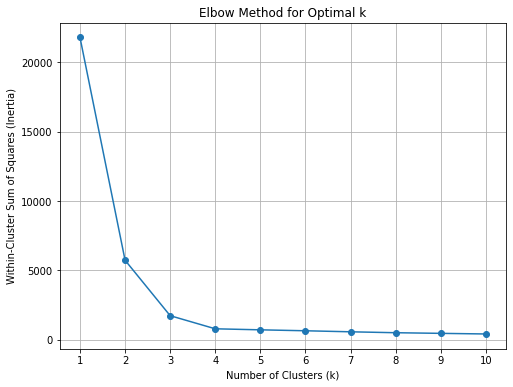

{1: 21781.792975992223,
 2: 5728.229140045009,
 3: 1733.979284964782,
 4: 789.0012783558575,
 5: 715.1990495229479,
 6: 647.2508363316529,
 7: 573.0677589857859,
 8: 506.647810798158,
 9: 460.9246547741196,
 10: 416.3319156674288}

In [ ]:
k_values = range(1, 11)

adjusted_inertia_dict = {}
init_method = 'k-means++'
n_init = 10
max_iter = 500

for k in k_values:
    kmeans = KMeans(n_clusters=k, init=init_method, n_init=n_init, max_iter=max_iter, random_state=42)
    kmeans.fit(kmeans_1)
    adjusted_inertia_dict[k] = kmeans.inertia_

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(list(adjusted_inertia_dict.keys()), list(adjusted_inertia_dict.values()), marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

adjusted_inertia_dict

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score

scaler = StandardScaler()
scaled_data2 = scaler.fit_transform(kmeans_2)

kmeans_results = {}
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data2)
    kmeans_results[k] = {
        "model": kmeans,
        "inertia": kmeans.inertia_,
        "davies_bouldin": davies_bouldin_score(scaled_data2, kmeans.labels_),
        "silhouette": silhouette_score(scaled_data2, kmeans.labels_)
    }

results_df = {
    "k": list(kmeans_results.keys()),
    "Inertia": [kmeans_results[k]["inertia"] for k in k_values],
    "Davies-Bouldin": [kmeans_results[k]["davies_bouldin"] for k in k_values],
    "Silhouette": [kmeans_results[k]["silhouette"] for k in k_values]
}

print(results_df)

KeyboardInterrupt: 

In [20]:
import numpy as np

class KMeansCustom:
    def __init__(self, max_iter=300, tolerance=1e-4):
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.centroids = None
        self.labels = None
        self.intra_cluster_distance = None
        self.inter_cluster_distance = None

    def initialize_centroids(self, data, k):
        indices = np.random.choice(data.shape[0], size=k, replace=False)
        self.centroids = data[indices]
    
    def assign_clusters(self, data):
        distances = np.linalg.norm(data[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)
    
    def update_centroids(self, data, labels, k):
        new_centroids = []
        for i in range(k):
            points = data[labels == i]
            new_centroids.append(points.mean(axis=0) if len(points) > 0 else self.centroids[i])
        self.centroids = np.array(new_centroids)
    
    def has_converged(self, old_centroids, new_centroids):
        return np.linalg.norm(new_centroids - old_centroids) < self.tolerance

    def fit(self, data, k):
        data = np.array(data)
        self.initialize_centroids(data, k)
        for _ in range(self.max_iter):
            old_centroids = self.centroids.copy()
            self.labels = self.assign_clusters(data)
            self.update_centroids(data, self.labels, k)
            if self.has_converged(old_centroids, self.centroids):
                break
        self.calculate_distances(data)

    def calculate_distances(self, data):
        self.intra_cluster_distance = np.sum(
            [np.linalg.norm(data[self.labels == i] - centroid) for i, centroid in enumerate(self.centroids)]
        )
        distances_between_centroids = np.linalg.norm(
            self.centroids[:, np.newaxis] - self.centroids, axis=2
        )
        self.inter_cluster_distance = np.sum(distances_between_centroids) / 2

    def predict(self, new_data):
        new_data = np.array(new_data)
        distances = np.linalg.norm(new_data[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

data_scaled = scaler.fit_transform(kmeans_2)
kmeans_custom = KMeansCustom(max_iter=500, tolerance=1e-4)
kmeans_custom.fit(data_scaled, k=3)

new_customers = [[0.5, 0.2, 1.0, -0.3, 0.1, 0.8, -0.2, 0.0]]
predicted_segments = kmeans_custom.predict(new_customers)

kmeans_custom.centroids, predicted_segments

(array([[-0.65929798,  0.13102578,  0.17388739,  0.08230107, -0.71331692,
         -0.08159963,  0.00276314, -0.06447984],
        [ 1.21393132, -0.29942339, -0.37942214, -0.16266503,  0.09578506,
          0.12703334, -0.31285968, -0.07064059],
        [-0.39656662,  0.15344458,  0.1806112 ,  0.06378113,  1.13308292,
         -0.0193022 ,  0.39652095,  0.20416172]]),
 array([1], dtype=int64))